# Import Important Librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import the dataset

In [ ]:
data = pd.read_csv('med-expense.csv')

# Explore the dataset

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Visualization

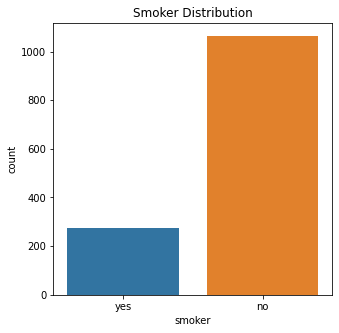

In [ ]:
# Pie chart for smoker column
plt.figure(figsize=(5,5))
plt.title('Smoker Distribution')
sns.countplot(x='smoker', data=data)
plt.show()

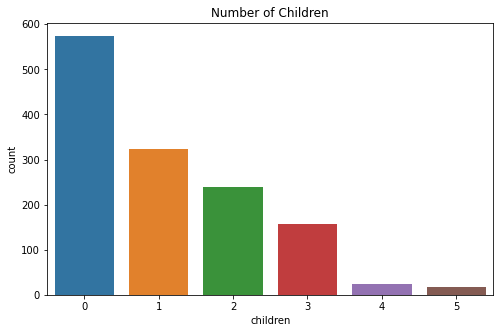

In [ ]:
# Count plot for number of children
plt.figure(figsize=(8,5))
plt.title('Number of Children')
sns.countplot(x='children', data=data)
plt.show()

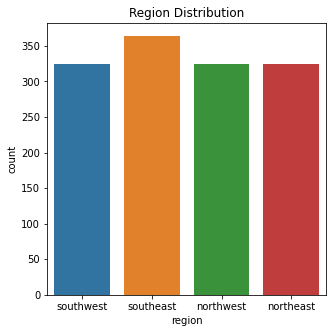

In [ ]:
# Pie chart for region column
plt.figure(figsize=(5,5))
plt.title('Region Distribution')
sns.countplot(x='region', data=data)
plt.show()

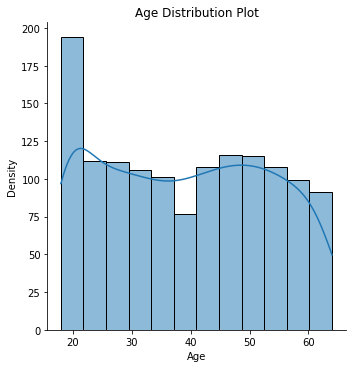

In [ ]:
# Distribution plot for Age
sns.displot(data=data, x='age', kde=True)
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

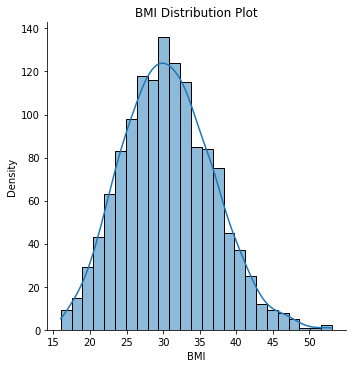

In [ ]:
# Distribution plot for BMI
sns.displot(data=data, x='bmi', kde=True)
plt.title('BMI Distribution Plot')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

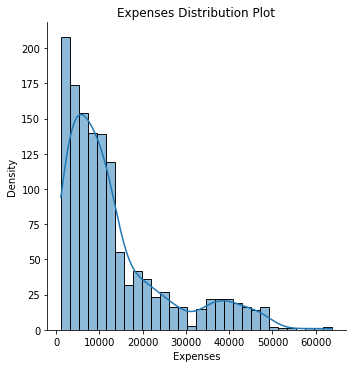

In [ ]:
# Distribution plot for Expenses
sns.displot(data=data, x='expenses', kde=True)
plt.title('Expenses Distribution Plot')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.show()

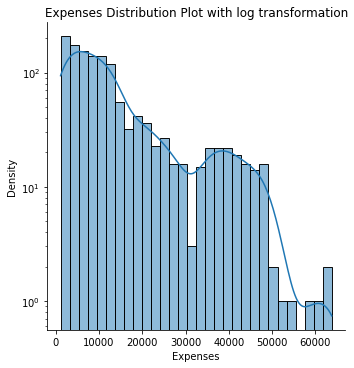

In [ ]:
# Distribution plot for Expenses with log transformation
sns.displot(data=data, x='expenses', kde=True)
plt.title('Expenses Distribution Plot with log transformation')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.yscale('log')
plt.show()

In [ ]:
# Scatter plot of age vs expenses
fig = px.scatter(data, x='age', y='expenses', trendline='ols', hover_data=['age', 'expenses'])
fig.show()

In [ ]:
# Scatter plot of BMI vs expenses
fig = px.scatter(data, x='bmi', y='expenses', trendline='ols', hover_data=['bmi', 'expenses'])
fig.show()

In [ ]:
# Box plot of expenses vs region
fig = px.box(data, x='region', y='expenses')
fig.show()

In [ ]:
# Box plot of expenses vs smoker
fig = px.box(data, x='smoker', y='expenses')
fig.show()

In [ ]:
# Box plot of expenses vs children
fig = px.box(data, x='children', y='expenses')
fig.show()

<Axes: xlabel='age', ylabel='expenses'>

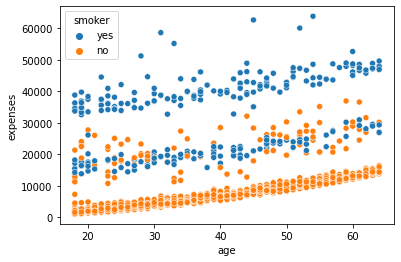

In [ ]:
# Create scatter plot between age and expenses with smoker column as color
sns.scatterplot(x='age', y='expenses', data=data, hue='smoker')

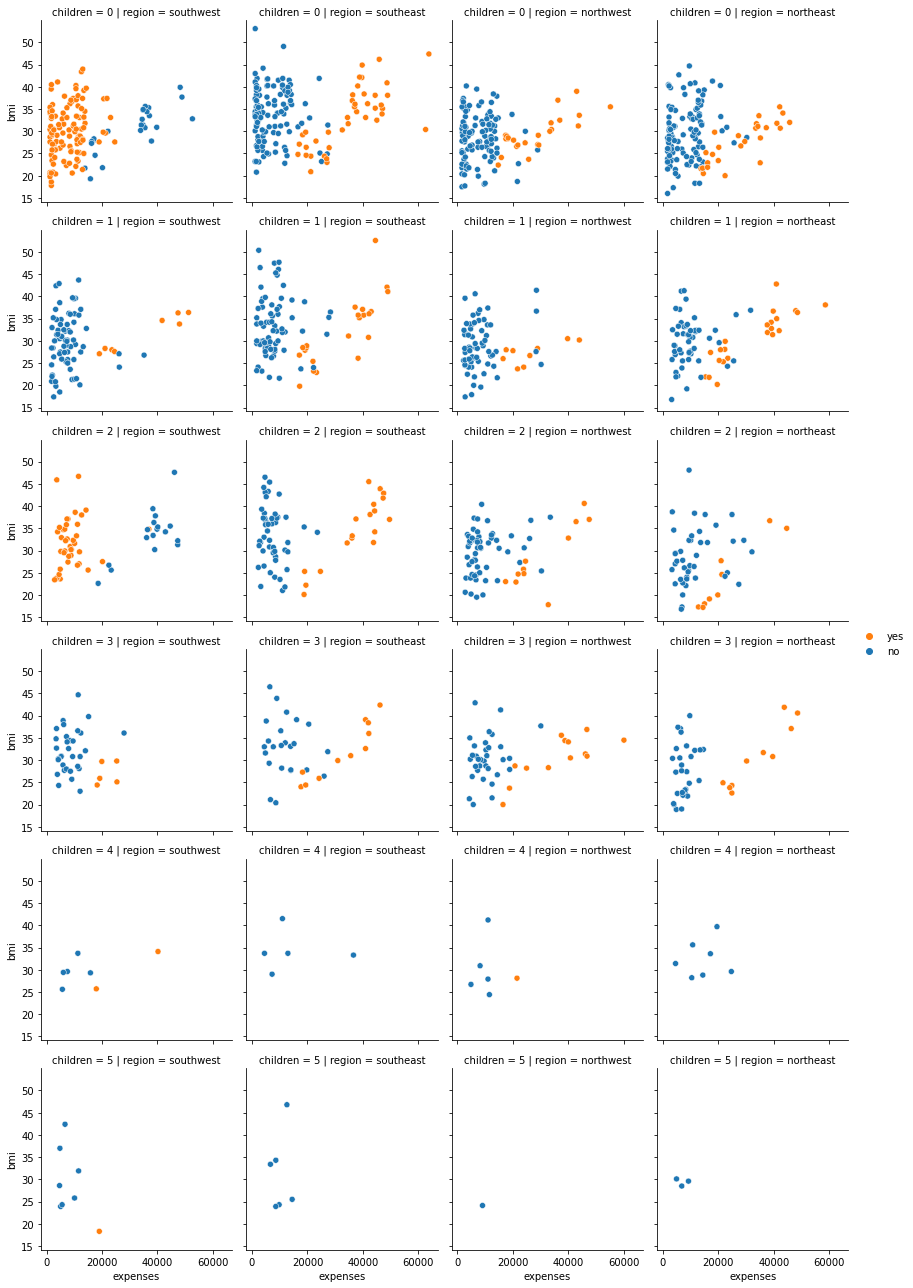

In [ ]:
# Add faceting layers for children and region columns
g = sns.FacetGrid(data, row='children', col='region')
g.map_dataframe(sns.scatterplot, x='expenses', y='bmi', hue='smoker')
g.add_legend()

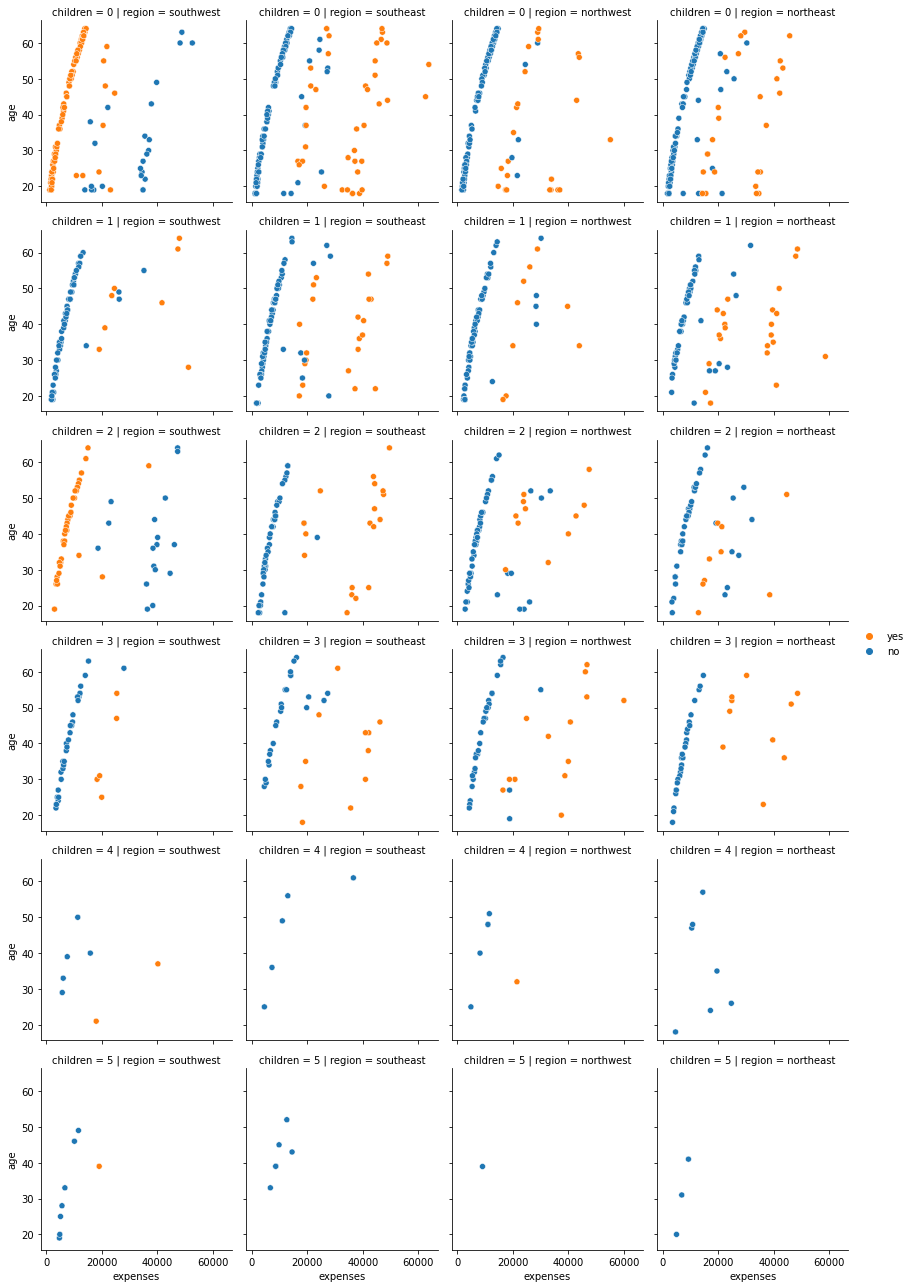

In [ ]:
# Add faceting layers for children and region columns
g = sns.FacetGrid(data, row='children', col='region')
g.map_dataframe(sns.scatterplot, x='expenses', y='age', hue='smoker')
g.add_legend()

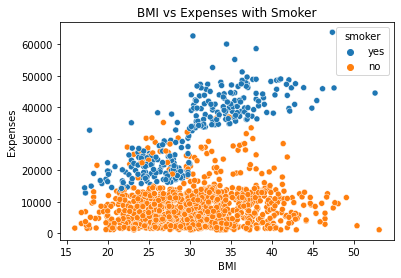

In [ ]:
# Scatter plot of BMI vs Expenses with smoker as hue
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=data)
plt.title('BMI vs Expenses with Smoker')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

In [ ]:
fig = px.scatter(data, x='bmi', y='expenses', color='smoker', size='age')
fig.show()

In [ ]:
fig = px.bar_polar(data, theta='region', r='expenses', color='sex', template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma_r, title='Medical Expenses by Region and Gender')
fig.show()

In [ ]:
df = data

In [ ]:
# Group by region and aggregate expenses
region_expenses = df.groupby('region')['expenses'].agg(['min', 'mean', 'max'])
print(region_expenses)

# Group by sex and aggregate expenses
sex_expenses = df.groupby('sex')['expenses'].agg(['min', 'mean', 'max'])
print(sex_expenses)

# Group by smoker and aggregate expenses
smoker_expenses = df.groupby('smoker')['expenses'].agg(['min', 'mean', 'max'])
print(smoker_expenses)

# Group by children and aggregate expenses
children_expenses = df.groupby('children')['expenses'].agg(['min', 'mean', 'max'])
print(children_expenses)

# Calculate skewness and kurtosis for each column
skewness = df.skew()
kurtosis = df.kurtosis()
print('Skewness:')
print(skewness)
print('Kurtosis:')
print(kurtosis)

               min          mean       max
region                                    
northeast  1694.80  13406.384691  58571.07
northwest  1621.34  12417.575169  60021.40
southeast  1121.87  14735.411538  63770.43
southwest  1241.57  12346.937908  52590.83
            min          mean       max
sex                                    
female  1607.51  12569.578897  63770.43
male    1121.87  13956.751420  62592.87
             min          mean       max
smoker                                  
no       1121.87   8434.268449  36910.61
yes     12829.46  32050.231971  63770.43
              min          mean       max
children                                 
0         1121.87  12365.975767  63770.43
1         1711.03  12731.171821  58571.07
2         2304.00  15073.564000  49577.66
3         3443.06  15355.318535  60021.40
4         4504.66  13850.656800  40182.25
5         4687.80   8786.035556  19023.26
Skewness:
age         0.055673
bmi         0.284593
children    0.938380
expenses 

<ipython-input-26-918071705bc8>:18: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-26-918071705bc8>:19: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Data Pre-processing

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Binary encoding
    df['sex'] = df['sex'].replace({'female': 0, 'male': 1})
    df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})
    
    # One-hot encoding
    region_dummies = pd.get_dummies(df['region'], prefix='region')
    df = pd.concat([df, region_dummies], axis=1)
    df = df.drop('region', axis=1)
    
    # Split df into X and y
    y = df['expenses']
    X = df.drop('expenses', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.797152,0.976766,-0.704206,-0.904002,-0.509664,-0.562544,1.788102,-0.600387,-0.587220
1,-1.271085,-1.023787,-0.704206,-0.085679,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
2,-0.985811,0.976766,-0.737076,-0.904002,-0.509664,1.777639,-0.559252,-0.600387,-0.587220
3,0.797152,-1.023787,-0.408379,1.550967,-0.509664,-0.562544,-0.559252,1.665591,-0.587220
4,0.868471,0.976766,1.481632,-0.085679,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
...,...,...,...,...,...,...,...,...,...
931,1.510338,0.976766,-0.293334,-0.904002,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
932,-0.914493,-1.023787,-0.211160,0.732644,-0.509664,1.777639,-0.559252,-0.600387,-0.587220
933,0.868471,-1.023787,0.709193,0.732644,1.962076,1.777639,-0.559252,-0.600387,-0.587220
934,0.083967,-1.023787,-1.394471,0.732644,1.962076,-0.562544,-0.559252,1.665591,-0.587220


In [ ]:
y_train

744      8827.21
363      2597.78
10       2721.32
970     10702.64
634      9391.35
          ...   
715     12146.97
905      4564.19
1096    44641.20
235     19444.27
1061    11554.22
Name: expenses, Length: 936, dtype: float64

# Model Building and training

In [ ]:
#Building
lr_model = LinearRegression()
RD_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()

In [ ]:
#Training
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Training
RD_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Training
GB_model.fit(X_train, y_train)

GradientBoostingRegressor()

# **Testing the Model**

In [ ]:
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression")
MSE_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", MSE_lr)
RMSE_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error:", RMSE_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared Value:", r2_lr)

Linear Regression
Mean Squared Error: 36776667.310628295
Mean Absolute Error: 4145.054431290426
R-squared Value: 0.7404916055186623


In [ ]:
y_pred_RD = RD_model.predict(X_test)
print("Random Forest")
MSE_RD = mean_squared_error(y_test, y_pred_RD)
print("Mean Squared Error:", MSE_RD)
RMSE_RD = mean_absolute_error(y_test, y_pred_RD)
print("Mean Absolute Error:", RMSE_RD)
r2_RD = r2_score(y_test, y_pred_RD)
print("R-squared Value:", r2_RD)

Random Forest
Mean Squared Error: 23773881.202326328
Mean Absolute Error: 2735.604643283583
R-squared Value: 0.8322435883247421


In [ ]:
y_pred_GB = GB_model.predict(X_test)
print("Gradient Boostingt")
MSE_GB = mean_squared_error(y_test, y_pred_GB)
print("Mean Squared Error:", MSE_GB)
RMSE_GB = mean_absolute_error(y_test, y_pred_GB)
print("Mean Absolute Error:", RMSE_GB)
r2_GB = r2_score(y_test, y_pred_GB)
print("R-squared Value:", r2_GB)

Gradient Boostingt
Mean Squared Error: 19680038.21447916
Mean Absolute Error: 2465.5391364456573
R-squared Value: 0.8611311058385402


In [ ]:
MSE_PER = {"linear regression": MSE_lr, 
           "Random Forest": MSE_RD,
           "Gradient Boosting": MSE_GB}

In [ ]:
RMSE_PER = {"linear regression": RMSE_lr,
           "Random Forest": RMSE_RD,
           "Gradient Boosting": RMSE_GB}

In [ ]:
r2_PER = {"linear regression": r2_lr,
           "Random Forest": r2_RD,
           "Gradient Boosting": r2_GB}

Text(0, 0.5, 'Model')

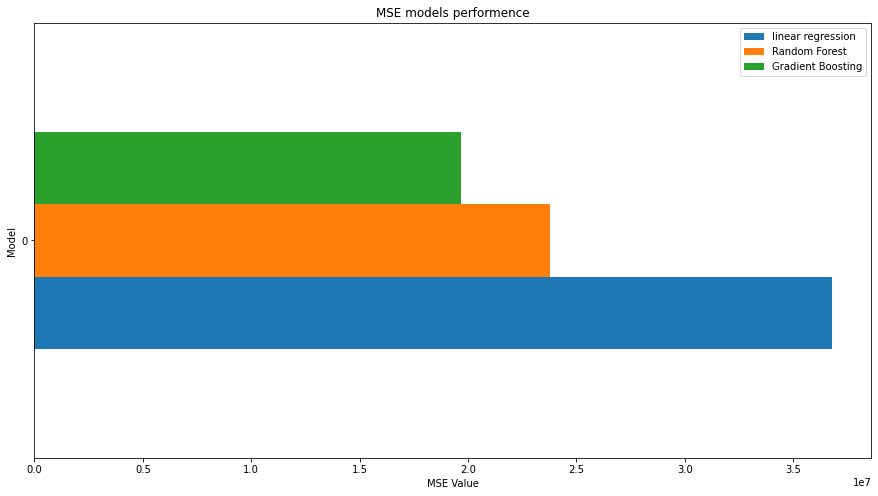

In [ ]:
MSE_PER_df = pd.DataFrame.from_records([MSE_PER])
MSE_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('MSE models performence')
plt.xlabel('MSE Value')
plt.ylabel('Model')

Text(0, 0.5, 'Model')

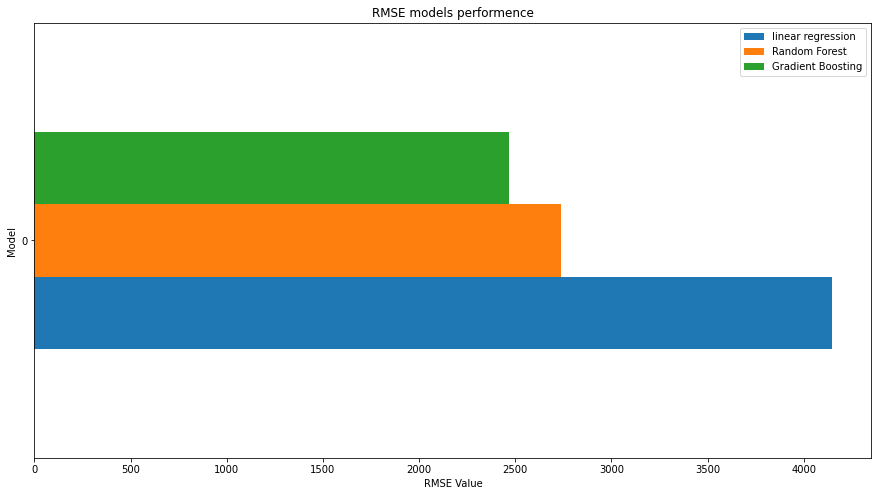

In [ ]:
RMSE_PER_df = pd.DataFrame.from_records([RMSE_PER])
RMSE_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('RMSE models performence')
plt.xlabel('RMSE Value')
plt.ylabel('Model')

Text(0, 0.5, 'Model')

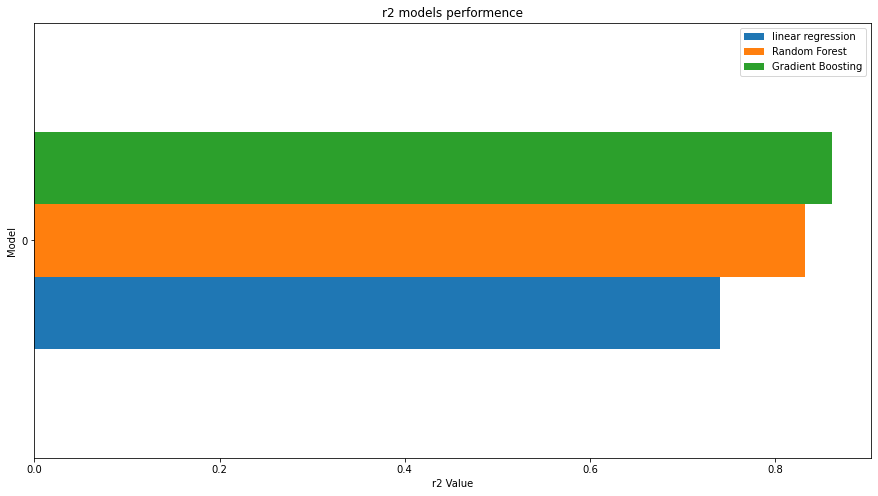

In [ ]:
r2_PER_df = pd.DataFrame.from_records([r2_PER])
r2_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('r2 models performence')
plt.xlabel('r2 Value')
plt.ylabel('Model')

# Building and training a Neural Network Model

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(9,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
nn_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 34ms/step - loss: 315752416.0000 - val_loss: 361122848.0000
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 315716896.0000 - val_loss: 361080480.0000
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 315671136.0000 - val_loss: 361020960.0000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 315604608.0000 - val_loss: 360935840.0000
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 315512608.0000 - val_loss: 360814432.0000
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 315380800.0000 - val_loss: 360650016.0000
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 315205696.0000 - val_loss: 360426048.0000
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 314968128.0000 - val_loss: 360130656.0000
Epoch 9/100
12/12 [==============================] - 0s 11ms/step - loss: 31

# Evaluate the Neural Network Model

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

In [ ]:
y_pred_nn = model.predict(X_test)
print("Neural Network Model")
MSE_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error:", MSE_nn)
RMSE_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error:", RMSE_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print("R-squared Value:", r2_nn)

13/13 [==============================] - 0s 2ms/step
Neural Network Model
Mean Squared Error: 36580504.85592375
Mean Absolute Error: 4371.895259772913
R-squared Value: 0.7418757930321183


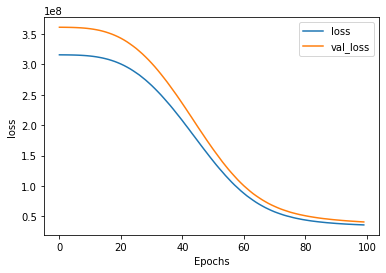

In [ ]:
plot_history(nn_model, 'loss')

# Changing the hyperparameters

In [ ]:
#Changing the learning rate
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
# Train the model
nn1_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 35409744.0000 - val_loss: 37137636.0000
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 33667944.0000 - val_loss: 35714560.0000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 33087272.0000 - val_loss: 34632808.0000
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 32878846.0000 - val_loss: 33955544.0000
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 32544492.0000 - val_loss: 34181288.0000
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 32415442.0000 - val_loss: 33965736.0000
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 32255872.0000 - val_loss: 33634908.0000
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 32029238.0000 - val_loss: 33745092.0000
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 31906688.0000 - val_lo

In [ ]:
y_pred_nn1 = model.predict(X_test)
print("Neural Network Model with learning_rate = 0.01")
MSE_nn1 = mean_squared_error(y_test, y_pred_nn1)
print("Mean Squared Error:", MSE_nn1)
RMSE_nn1 = mean_absolute_error(y_test, y_pred_nn1)
print("Mean Absolute Error:", RMSE_nn1)
r2_nn1 = r2_score(y_test, y_pred_nn1)
print("R-squared Value:", r2_nn1)

13/13 [==============================] - 0s 2ms/step
Neural Network Model with learning_rate = 0.01
Mean Squared Error: 24292541.91567747
Mean Absolute Error: 3012.8705228253266
R-squared Value: 0.8285837458527354


In [ ]:
#Changing the learning rate
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
# Train the model
nn2_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 24882230.0000 - val_loss: 32486792.0000
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 23478834.0000 - val_loss: 28135018.0000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 24179726.0000 - val_loss: 31056078.0000
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 23093320.0000 - val_loss: 27563254.0000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 22217612.0000 - val_loss: 28659200.0000
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 21938604.0000 - val_loss: 26741810.0000
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 21439880.0000 - val_loss: 30268950.0000
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 21903794.0000 - val_loss: 27070750.0000
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 20726478.0000 - val_lo

In [ ]:
y_pred_nn2 = model.predict(X_test)
print("Neural Network Model with learning rate = 0.1")
MSE_nn2 = mean_squared_error(y_test, y_pred_nn2)
print("Mean Squared Error:", MSE_nn2)
RMSE_nn2 = mean_absolute_error(y_test, y_pred_nn2)
print("Mean Absolute Error:", RMSE_nn2)
r2_nn2 = r2_score(y_test, y_pred_nn2)
print("R-squared Value:", r2_nn2)

13/13 [==============================] - 0s 2ms/step
Neural Network Model with learning rate = 0.1
Mean Squared Error: 26160701.75783874
Mean Absolute Error: 3107.235129503089
R-squared Value: 0.8154013887571626


In [ ]:
#Changing the learning rate
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

In [ ]:
# Train the model
nn3_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 32118860.0000 - val_loss: 39023272.0000
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 25136590.0000 - val_loss: 31232408.0000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 18613220.0000 - val_loss: 31210588.0000
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 15938605.0000 - val_loss: 31676258.0000
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 15288376.0000 - val_loss: 29141220.0000
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 14353512.0000 - val_loss: 28979734.0000
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 14577548.0000 - val_loss: 31998072.0000
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 14643789.0000 - val_loss: 36598964.0000
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 15170815.0000 - val_lo

In [ ]:
y_pred_nn3 = model.predict(X_test)
print("Neural Network Model with learning rate = 0.2")
MSE_nn3 = mean_squared_error(y_test, y_pred_nn3)
print("Mean Squared Error:", MSE_nn3)
RMSE_nn3 = mean_absolute_error(y_test, y_pred_nn3)
print("Mean Absolute Error:", RMSE_nn3)
r2_nn3 = r2_score(y_test, y_pred_nn3)
print("R-squared Value:", r2_nn3)

13/13 [==============================] - 0s 3ms/step
Neural Network Model with learning rate = 0.2
Mean Squared Error: 33360819.274656724
Mean Absolute Error: 3604.5666957084695
R-squared Value: 0.7645949651874444


In [ ]:
MSE_NN_PER = {"lr=0.001": MSE_nn, "lr=0.01": MSE_nn1, "lr=0.1": MSE_nn2, "lr=0.2": MSE_nn3}
RMSE_NN_PER = {"lr=0.001": RMSE_nn, "lr=0.01": RMSE_nn1, "lr=0.1": RMSE_nn2, "lr=0.2": RMSE_nn3}
r2_NN_PER = {"lr=0.001": r2_nn, "lr=0.01": r2_nn1, "lr=0.1": r2_nn2, "lr=0.2": r2_nn3}

Text(0, 0.5, 'Models with different learning rate')

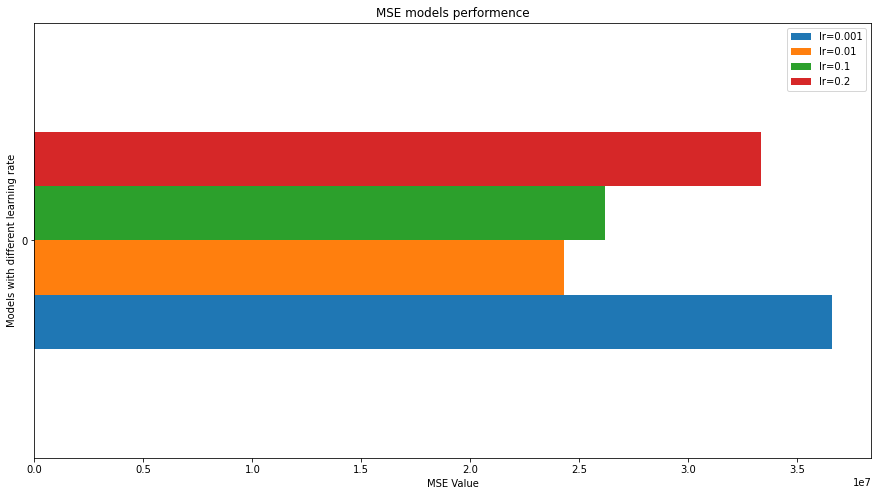

In [ ]:
MSE_NN_PER_df = pd.DataFrame.from_records([MSE_NN_PER])
MSE_NN_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('MSE models performence')
plt.xlabel('MSE Value')
plt.ylabel('Models with different learning rate')

Text(0, 0.5, 'Models with different learning rate')

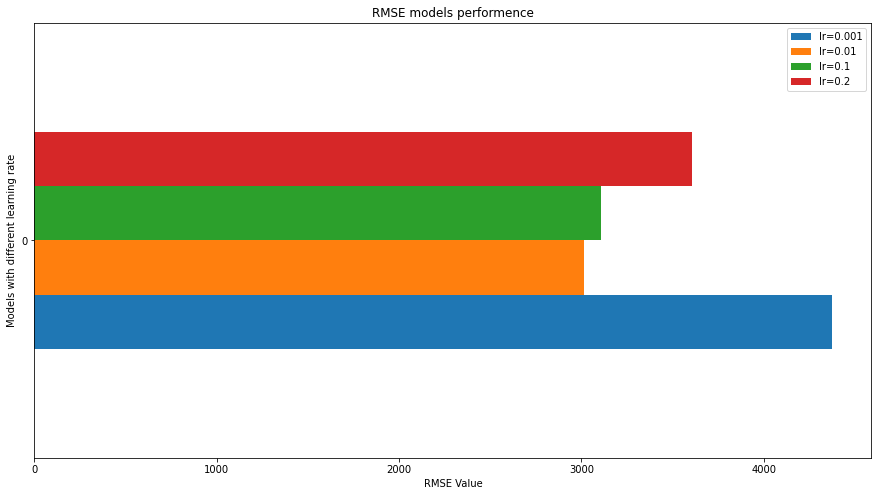

In [ ]:
RMSE_NN_PER_df = pd.DataFrame.from_records([RMSE_NN_PER])
RMSE_NN_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('RMSE models performence')
plt.xlabel('RMSE Value')
plt.ylabel('Models with different learning rate')

Text(0, 0.5, 'Models with different learning rate')

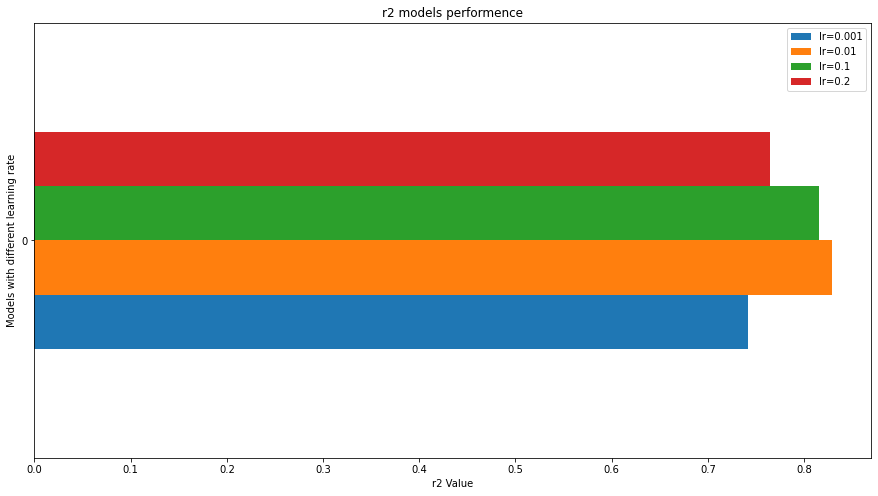

In [ ]:
r2_NN_PER_df = pd.DataFrame.from_records([r2_NN_PER])
r2_NN_PER_df.plot(kind='barh',figsize=(15, 8))
plt.title('r2 models performence')
plt.xlabel('r2 Value')
plt.ylabel('Models with different learning rate')

# Conclusion

In [ ]:
MSE_Performence = {}

In [ ]:
MSE_Performence.update(MSE_PER)

In [ ]:
MSE_Performence.update(MSE_NN_PER)

Text(0, 0.5, 'Models')

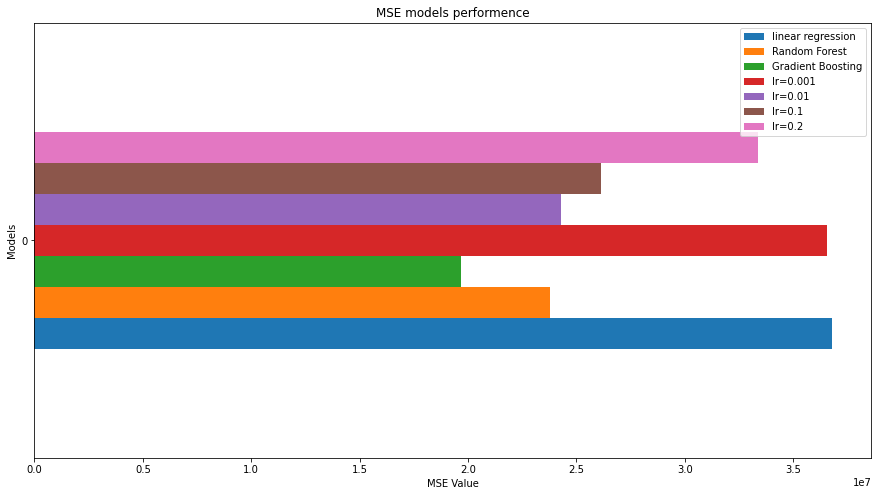

In [ ]:
MSE_Performence_df = pd.DataFrame.from_records([MSE_Performence])
MSE_Performence_df.plot(kind='barh',figsize=(15, 8))
plt.title('MSE models performence')
plt.xlabel('MSE Value')
plt.ylabel('Models')

In [ ]:
RMSE_Performence = {}
RMSE_Performence.update(RMSE_PER)
RMSE_Performence.update(RMSE_NN_PER)

Text(0, 0.5, 'Models')

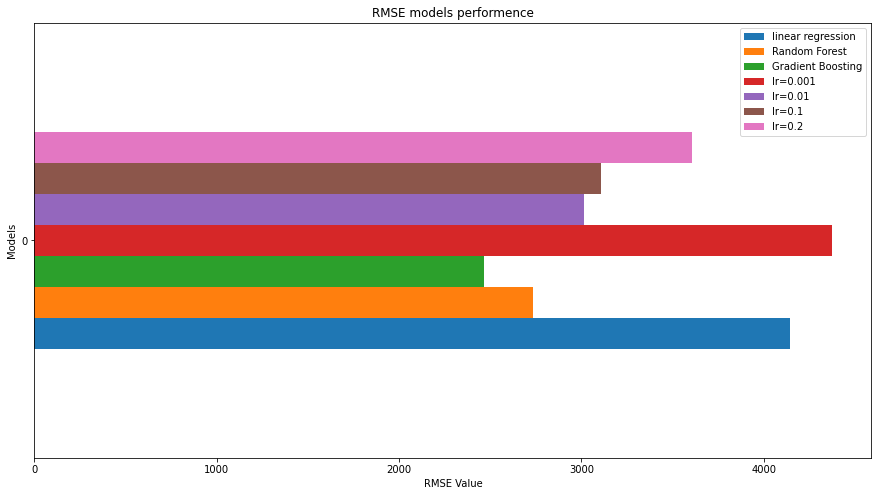

In [ ]:
RMSE_Performence_df = pd.DataFrame.from_records([RMSE_Performence])
RMSE_Performence_df.plot(kind='barh',figsize=(15, 8))
plt.title('RMSE models performence')
plt.xlabel('RMSE Value')
plt.ylabel('Models')

In [ ]:
r2_Performence = {}
r2_Performence.update(r2_PER)
r2_Performence.update(r2_NN_PER)

Text(0, 0.5, 'Models')

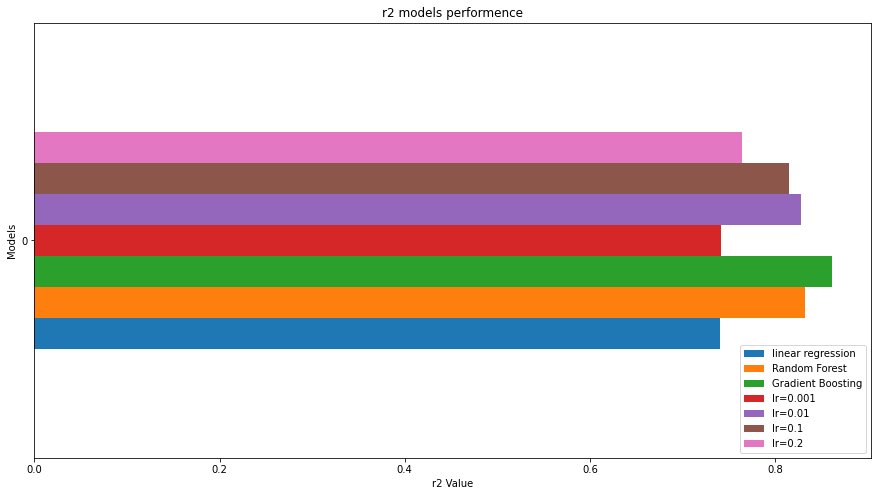

In [ ]:
r2_Performence_df = pd.DataFrame.from_records([r2_Performence])
r2_Performence_df.plot(kind='barh',figsize=(15, 8))
plt.title('r2 models performence')
plt.xlabel('r2 Value')
plt.ylabel('Models')